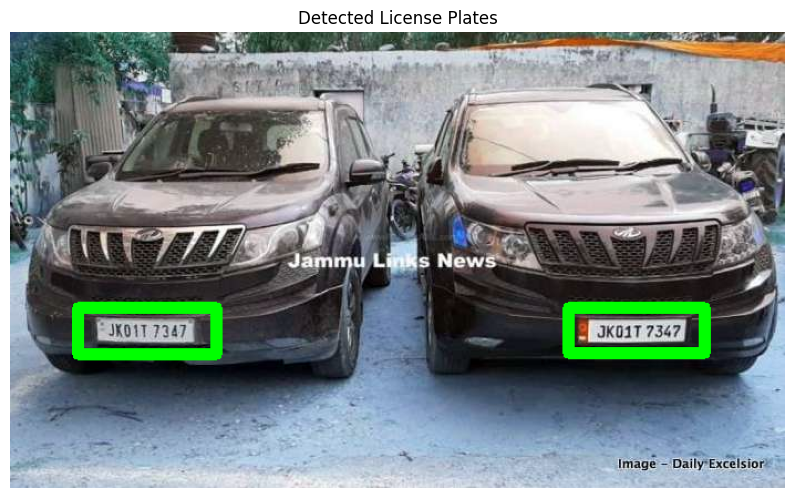

In [9]:
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np
from io import BytesIO
from PIL import Image

# Load image from the web
image_url = "https://rushlane.com/wp-content/uploads/2019/06/mahindra-xuv500-same-number-plate.jpg"  # Replace with your image URL
response = requests.get(image_url)
image_data = BytesIO(response.content)

# Open the image using PIL and convert to numpy array
img = Image.open(image_data)
image = np.array(img)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Haar cascade for license plate detection
plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

# Detect license plates
plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw rectangles around detected license plates
for (x, y, w, h) in plates:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 10)  # Green box for license plates

# Convert BGR to RGB for display with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show image with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Detected License Plates')
plt.show()

